In [0]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [0]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import random

import warnings
warnings.filterwarnings("ignore")

Toy Dataset

In [0]:
data_1 = np.array([[random.randint(1,400) for i in range(2)] for  j in range(50)],dtype=np.float64)
data_2 = np.array([[random.randint(300,700) for i in range(2)] for  j in range(50)],dtype=np.float64)
data_3 = np.array([[random.randint(600,900) for i in range(2)] for  j in range(50)],dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis = 0), data_3, axis=0)


In [0]:
data.shape

(150, 2)

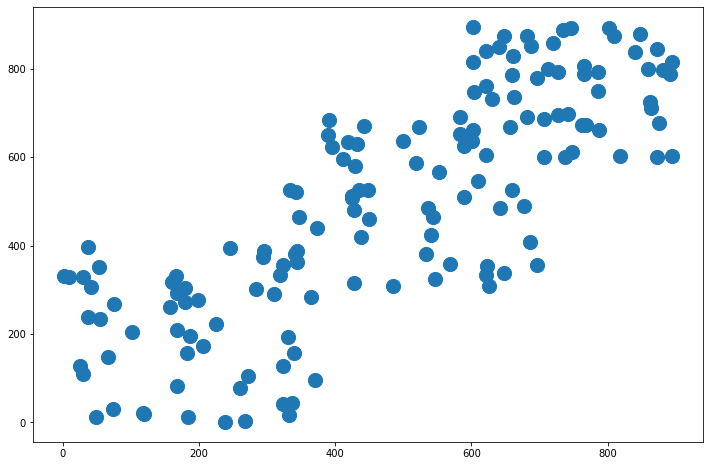

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(data[:,0], data[:,1], s = 200)

In [0]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1,labels_2, axis=0), labels_3,axis=0)

In [0]:
labels.shape

(150,)

In [0]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
df = pd.DataFrame({'data_x' : data[:,0],'data_y' : data[:,1], 'labels' : labels})
df.sample(10)

,data_x,data_y,labels
34,30.0,110.0,0
83,536.0,485.0,1
26,73.0,31.0,0
23,118.0,21.0,0
97,419.0,635.0,1
128,876.0,678.0,2
103,810.0,874.0,2
115,604.0,747.0,2
136,712.0,799.0,2
14,336.0,43.0,0


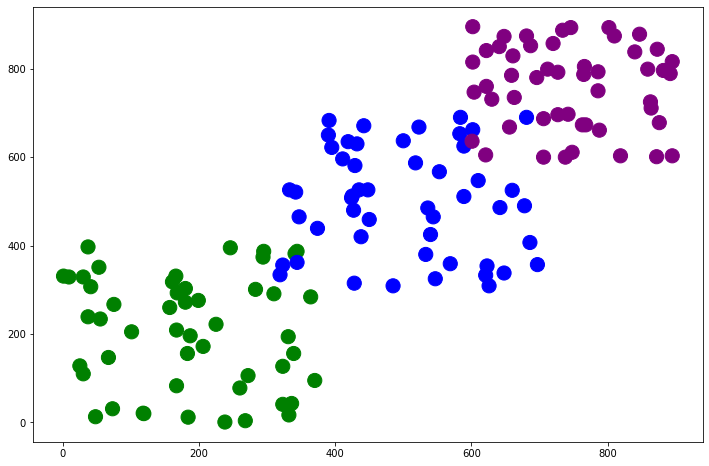

In [0]:
colors = ['green','blue', 'purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'],df['data_y'],c = df['labels'], s= 200, cmap=matplotlib.colors.ListedColormap(colors))

In [0]:
kmeans_model = KMeans(n_clusters= 3, max_iter=10000).fit(data)

In [0]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
centroids = kmeans_model.cluster_centers_
centroids # need not be points in original data
#first is 0, second is 2 and third is 1

array([[185.5       , 202.92      ],
       [742.31372549, 760.50980392],
       [500.63265306, 495.48979592]])

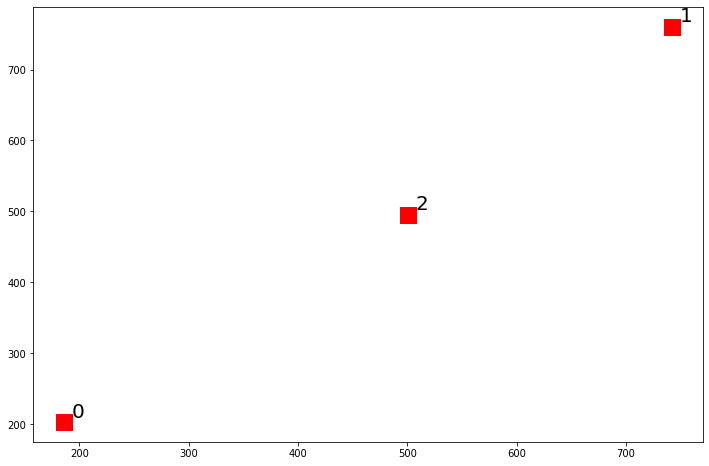

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(centroids[:,0], centroids[:,1], c = 'r', s = 250, marker='s')

for i in range(len(centroids)):
  plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)

Evaluation

In [0]:
print('Homogeneity score : ', metrics.homogeneity_score(labels, kmeans_model.labels_)) 
#check if all points in group stay in group

print('completeness score : ', metrics.completeness_score(labels, kmeans_model.labels_))
#same class same cluster

print('v_measure score : ', metrics.v_measure_score(labels,kmeans_model.labels_))
#even weigtage of both above metrics

print('adjusted rand score : ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))
#close to zero- data was randomly labelled and close to 1 - actual and predicted clusters are identical

print('adjusted mutual info score : ', metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
#adjusted to account for chance and same as before

print('silhouette score : ' ,metrics.silhouette_score(data, kmeans_model.labels_) )
#uses distance metric, 

Homogeneity score :  0.7789112471713289
completeness score :  0.779005797693263
v_measure score :  0.7789585195631441
adjusted rand score :  0.8283071514765641
adjusted mutual info score :  0.7761920436403793
silhouette score :  0.4830797583270146


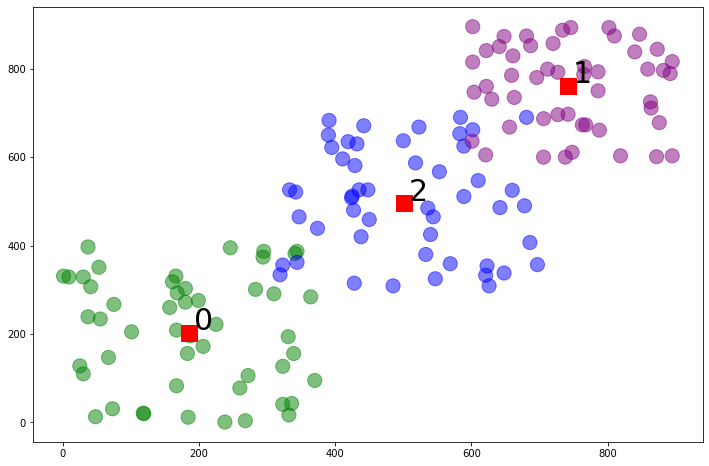

In [0]:
colors = ['green' , 'blue', 'purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c= df['labels'], s = 200, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

for i in range(len(centroids)):
  plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 30)

Prediction

In [0]:
data_test = np.array([[442.,621.],
                      [50., 153.],
                      [333.,373.],
                      [835., 816.]])

In [0]:
label_pred = kmeans_model.predict(data_test)

In [0]:
label_pred

array([2, 0, 2, 1], dtype=int32)

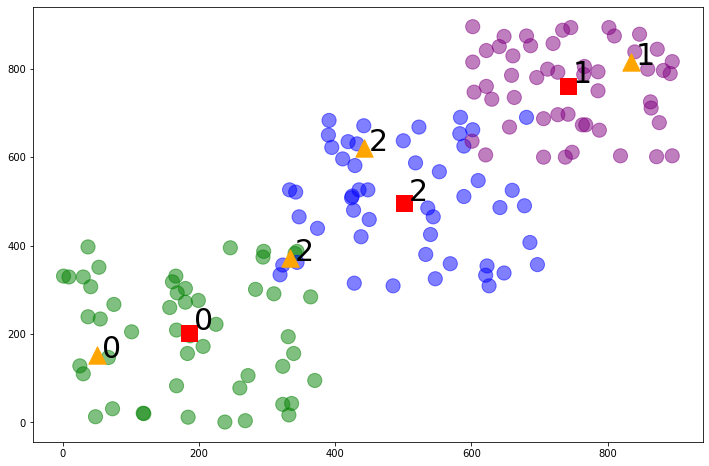

In [0]:
colors = ['green' , 'blue', 'purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c= df['labels'], s = 200, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(data_test[:,0],data_test[:,1], c ='orange', s = 300, marker= '^')

for i in range(len(label_pred)):
  plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize = 30)

plt.scatter(centroids[:,0],centroids[:,1], c ='r', s = 250, marker= 's')

for i in range(len(centroids)):
  plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 30)

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [0]:
iris_df = pd.read_csv('iris.csv',skiprows=1,names=['sepal-length',
                                                            'sepal-width',
                                                            'petal-length',
                                                            'petal-width',
                                                            'class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


shuffle data

In [0]:
iris_df = iris_df.sample(frac=1).reset_index(drop = True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.3,3.7,1.5,0.2,Iris-setosa
1,5.7,3.8,1.7,0.3,Iris-setosa
2,5.0,3.4,1.5,0.2,Iris-setosa
3,6.0,2.7,5.1,1.6,Iris-versicolor
4,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
iris_df.shape

(150, 5)

In [0]:
iris_df['class'].unique() #tells us all unique labels in data

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
#label encoder converts it to a number
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.3,3.7,1.5,0.2,0
1,5.7,3.8,1.7,0.3,0
2,5.0,3.4,1.5,0.2,0
3,6.0,2.7,5.1,1.6,1
4,4.9,3.1,1.5,0.1,0


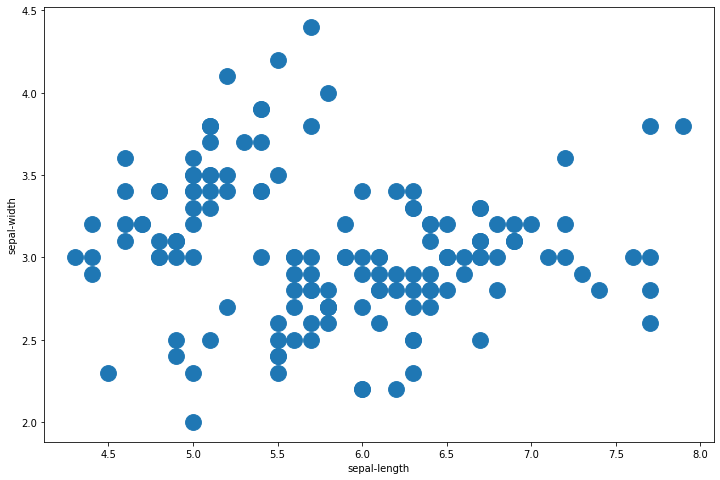

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(iris_df['sepal-length'],iris_df['sepal-width'], s = 250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

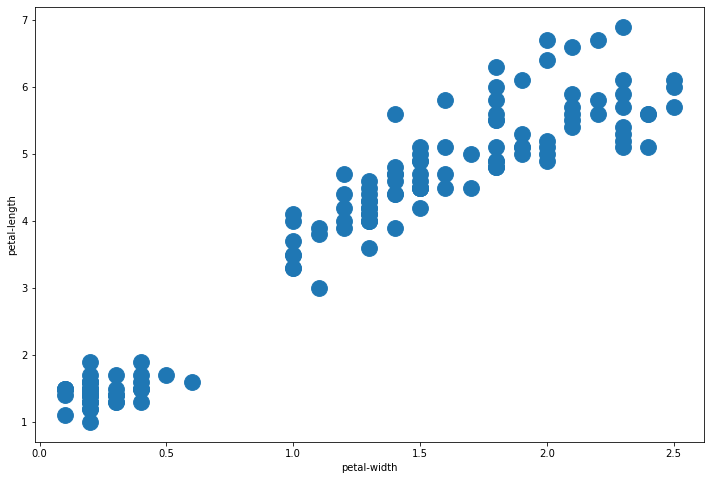

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(iris_df['petal-width'],iris_df['petal-length'], s = 250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

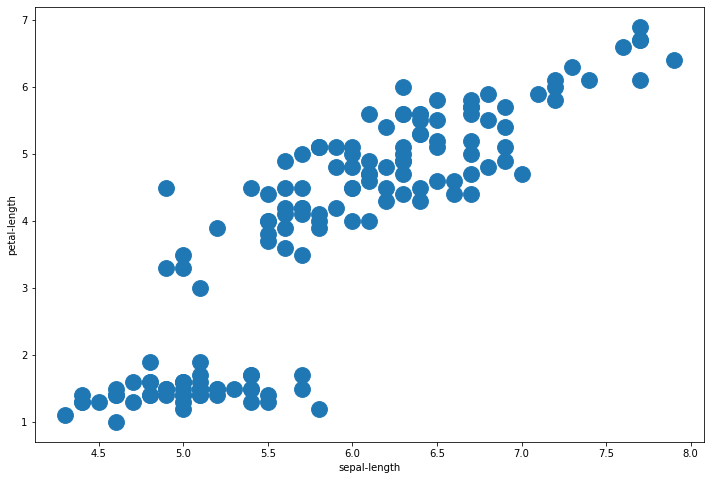

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(iris_df['sepal-length'],iris_df['petal-length'], s = 250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

Selecting two features that show us easy to form clusters

In [0]:
iris_2D = iris_df[['sepal-length', 'petal-length']]
iris_2D.sample(5)

,sepal-length,petal-length
135,5.2,3.9
142,5.9,4.8
94,5.5,3.8
92,5.5,3.7
60,6.3,4.4


In [0]:
iris_2D.shape

(150, 2)

In [0]:
iris_2D = np.array(iris_2D)

In [0]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

In [0]:
kmeans_model_2D.labels_

array([0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2], dtype=int32)

In [0]:
centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

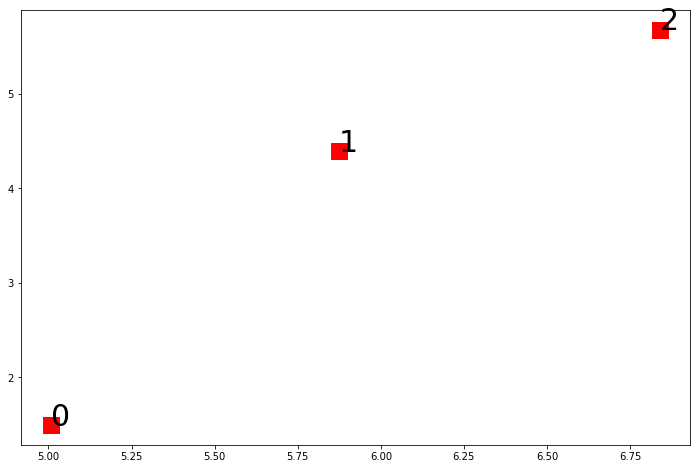

In [0]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c = 'r', s = 250, marker='s')

for i in range(len(centroids_2D)):
  plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize = 30)

In [0]:
iris_labels = iris_df['class']

In [0]:
print('Homogeneity score : ', metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_)) 
#check if all points in group stay in group

print('completeness score : ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
#same class same cluster

print('v_measure score : ', metrics.v_measure_score(iris_labels,kmeans_model_2D.labels_))
#even weigtage of both above metrics

print('adjusted rand score : ', metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
#close to zero- data was randomly labelled and close to 1 - actual and predicted clusters are identical

print('adjusted mutual info score : ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))
#adjusted to account for chance and same as before

print('silhouette score : ' ,metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_) )
#uses distance metric, 

Homogeneity score :  0.7033177646052958
completeness score :  0.7096993707802843
v_measure score :  0.706494157075837
adjusted rand score :  0.6988627672348092
adjusted mutual info score :  0.7028024531409133
silhouette score :  0.5890612473759282


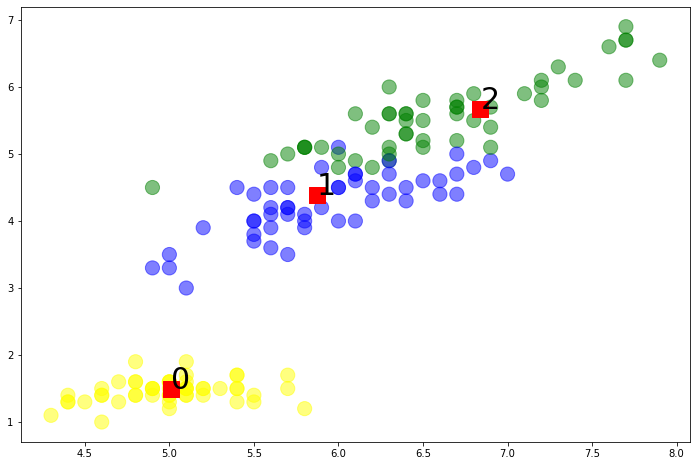

In [0]:
colors = ['yellow' , 'blue', 'green']
plt.figure(figsize=(12,8))

plt.scatter(iris_df['sepal-length'],iris_df['petal-length'], c= iris_df['class'], s = 200, cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids_2D[:,0],centroids_2D[:,1], c ='r', s = 250, marker= 's')

for i in range(len(centroids_2D)):
  plt.annotate(i, (centroids_2D[i][0] , centroids_2D[i][1] ), fontsize = 30)

In [0]:
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.3,3.7,1.5,0.2
1,5.7,3.8,1.7,0.3
2,5.0,3.4,1.5,0.2
3,6.0,2.7,5.1,1.6
4,4.9,3.1,1.5,0.1


In [0]:
iris_labels = iris_df['class']

iris_labels.sample(5)

87     2
109    0
6      1
148    1
145    2
Name: class, dtype: int64

In [0]:
kmeans_model1 = KMeans(n_clusters=3).fit(iris_features)

In [0]:
kmeans_model1.labels_

array([2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [0]:
kmeans_model1.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [0]:
print('Homogeneity score : ', metrics.homogeneity_score(iris_labels, kmeans_model1.labels_)) 
#check if all points in group stay in group

print('completeness score : ', metrics.completeness_score(iris_labels, kmeans_model1.labels_))
#same class same cluster

print('v_measure score : ', metrics.v_measure_score(iris_labels,kmeans_model1.labels_))
#even weigtage of both above metrics

print('adjusted rand score : ', metrics.adjusted_rand_score(iris_labels, kmeans_model1.labels_))
#close to zero- data was randomly labelled and close to 1 - actual and predicted clusters are identical

print('adjusted mutual info score : ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model1.labels_))
#adjusted to account for chance and same as before

print('silhouette score : ' ,metrics.silhouette_score(iris_features, kmeans_model1.labels_) )
#uses distance metric, 

#since we increased the number of features, it apparently improved a little bit

Homogeneity score :  0.7514854021988338
completeness score :  0.7649861514489815
v_measure score :  0.7581756800057784
adjusted rand score :  0.7302382722834697
adjusted mutual info score :  0.7551191675800484
silhouette score :  0.5525919445499757
